<a href="https://colab.research.google.com/github/kunalchandra18/Lattice-Physics/blob/main/Lattice_Physics_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-optimize #if skopt doesnt get imported

In [6]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.model_selection import cross_val_score as cvs
import sklearn.metrics as metric
from skopt import BayesSearchCV as bs

In [7]:
# Step - 1 : Problem Statement : To predict Infinite Multiplication Factor(IMF) and PPPF

In [8]:
# Step - 2 : Data Acquisition
data = pd.read_fwf("/content/raw.csv", header = None)
test = pd.read_fwf("/content/test.csv",header = None)
data.isnull().sum().to_numpy() # shows that the dataset has no missing values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
#Step - 3 : Data Exploration
data.describe()
# from the mean,std,min,max of each column it is clear that column 0 is pppf and column 1 is IMF

0             1             2             3             4   \
count  24000.000000  24000.000000  24000.000000  24000.000000  24000.000000   
mean       1.325139      1.883559      2.855694      2.859994      2.857451   
std        0.017798      0.120018      1.240040      1.238304      1.237204   
min        1.246360      1.527497      0.700055      0.700098      0.700080   
25%        1.313650      1.798641      1.778343      1.784898      1.785185   
50%        1.326085      1.876336      2.855621      2.869736      2.873263   
75%        1.337683      1.960852      3.935998      3.931073      3.921500   
max        1.385580      2.473015      4.999537      4.999781      4.999613   

                 5             6             7             8             9   \
count  24000.000000  24000.000000  24000.000000  24000.000000  24000.000000   
mean       2.867554      2.848997      2.840123      2.867360      2.850948   
std        1.234584      1.243988      1.242275      1.242041      1.243739   
min        0.700019      0.700079      0.700042      0.700169      0.700152   
25%        1.805416      1.767307      1.763301      1.784607      1.768854   
50%        2.875835      2.844372      2.841756      2.885330      2.852607   
75%        3.939858      3.918052      3.918678      3.938584      3.927791   
max        4.999984      4.999956      4.999745      4.999930      4.999936   

       ...            31            32            33            34  \
count  ...  24000.000000  24000.000000  24000.000000  24000.000000   
mean   ...      2.846118      2.846239      2.839146      2.838850   
std    ...      1.242851      1.244249      1.242941      1.239665   
min    ...      0.700021      0.700129      0.700026      0.700084   
25%    ...      1.769069      1.759647      1.762613      1.772523   
50%    ...      2.838541      2.845264      2.828400      2.819288   
75%    ...      3.927562      3.923765      3.921124      3.908517   
max    ...      4.999780      4.999927      4.999774      4.999744   

                 35            36            37            38            39  \
count  24000.000000  24000.000000  24000.000000  24000.000000  24000.000000   
mean       2.846678      2.845871      2.838678      2.844885      2.851978   
std        1.243829      1.239855      1.245019      1.243721      1.237966   
min        0.700008      0.700254      0.700188      0.700112      0.700101   
25%        1.769221      1.780978      1.747693      1.776082      1.775471   
50%        2.848433      2.832606      2.842550      2.837816      2.855193   
75%        3.931616      3.909285      3.917983      3.918358      3.916448   
max        4.999910      4.999665      4.999367      4.999866      4.999340   

                 40  
count  24000.000000  
mean       2.851249  
std        1.246842  
min        0.700251  
25%        1.765346  
50%        2.848884  
75%        3.932423  
max        4.999952  

[8 rows x 41 columns]

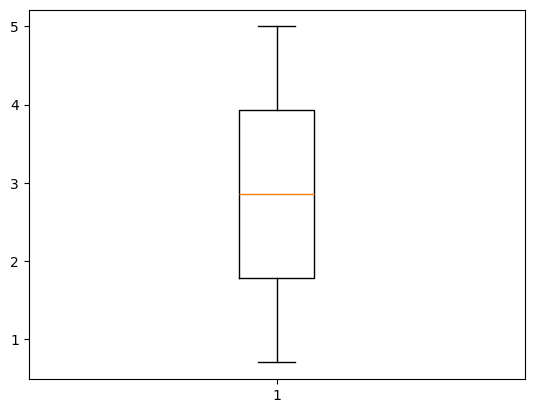

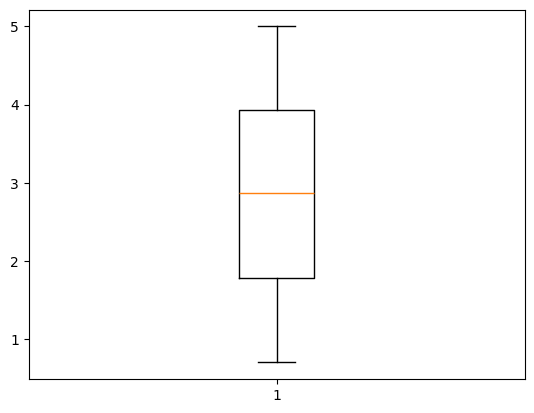

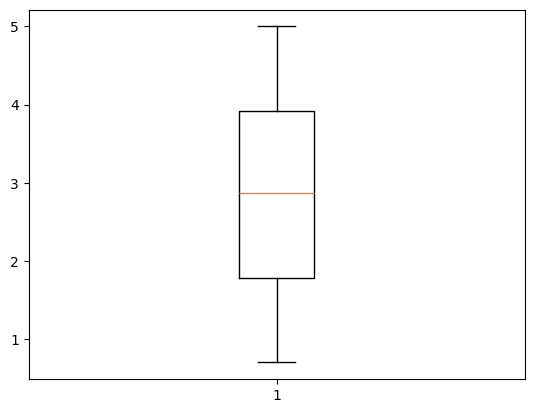

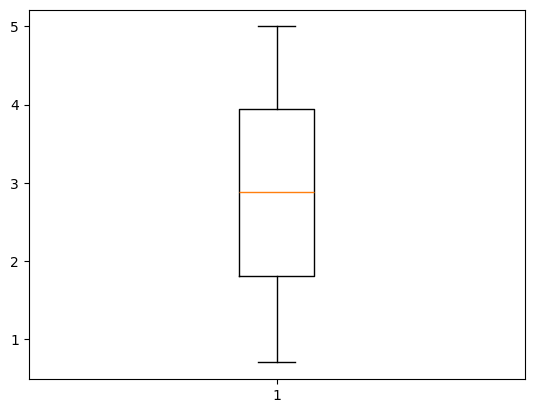

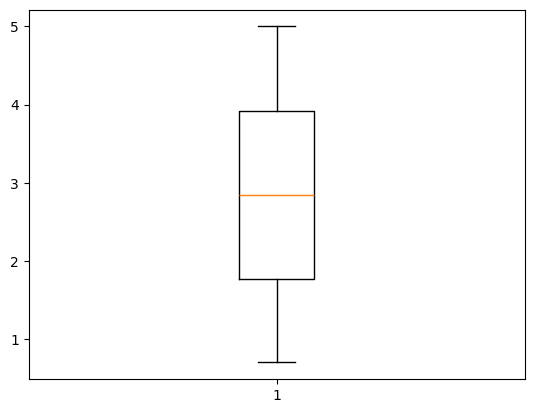

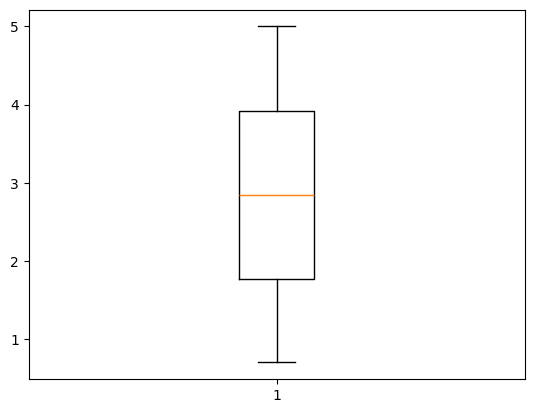

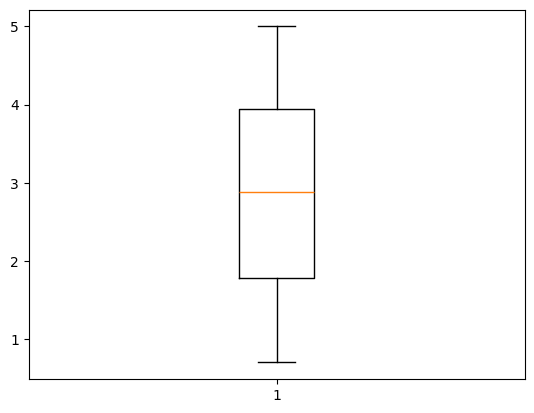

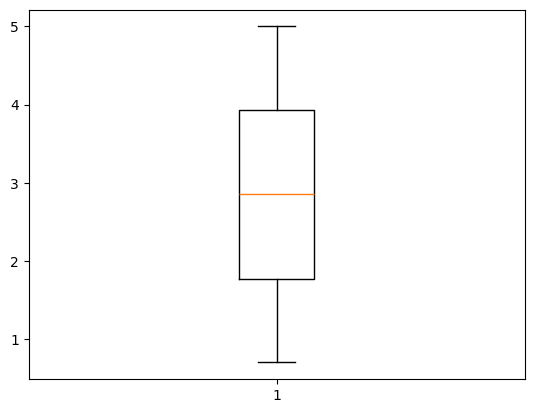

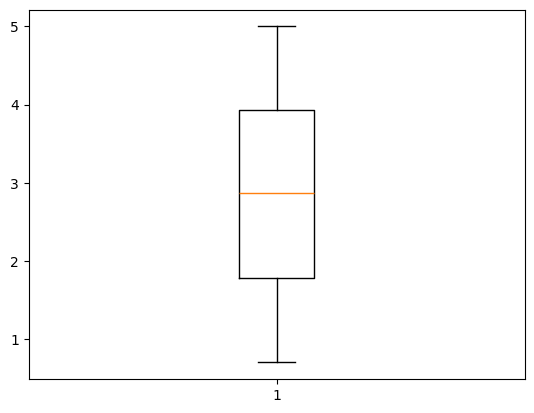

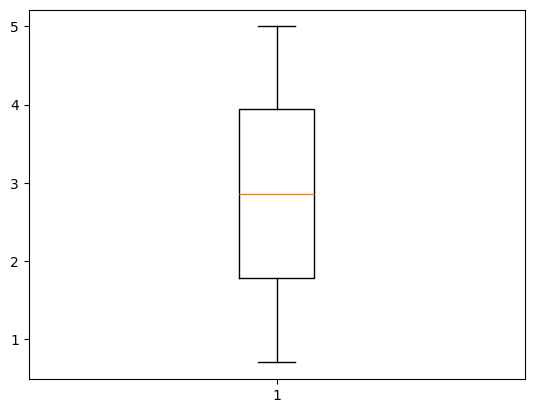

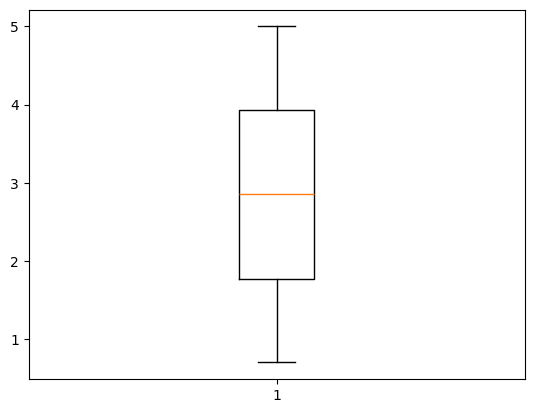

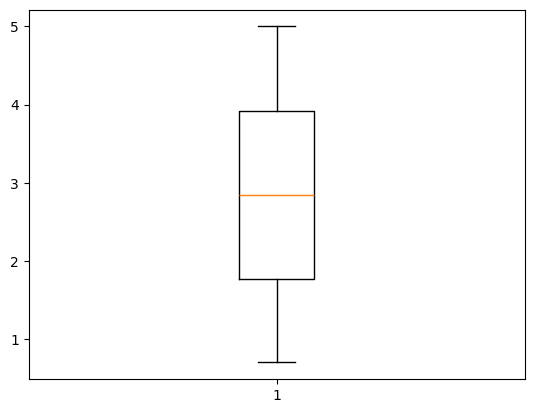

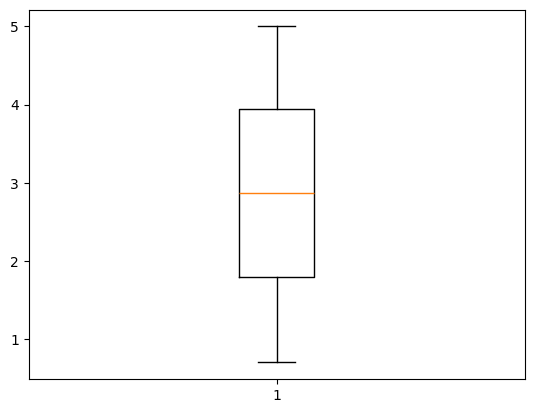

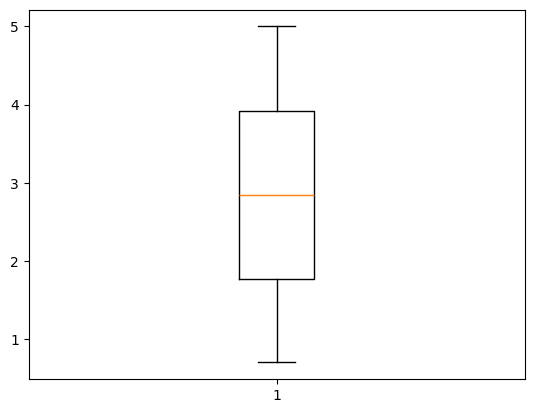

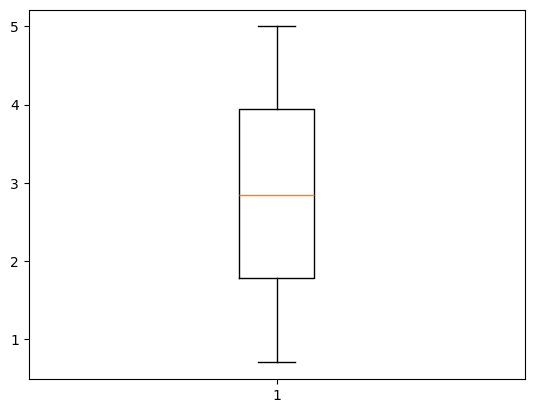

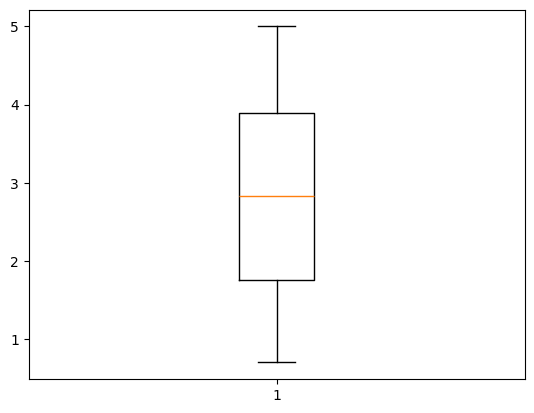

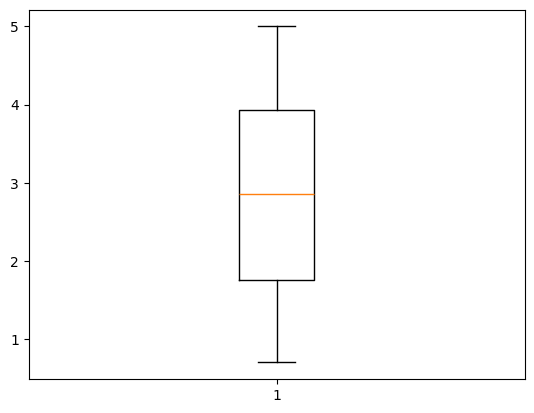

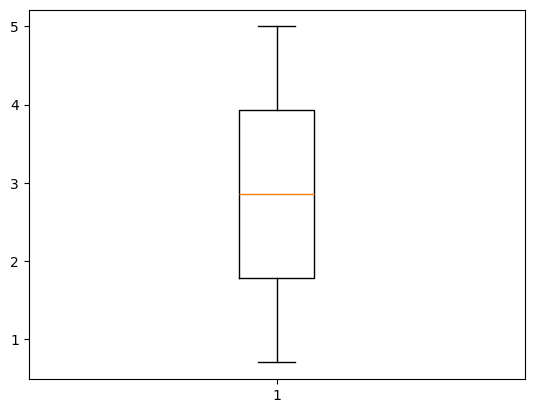

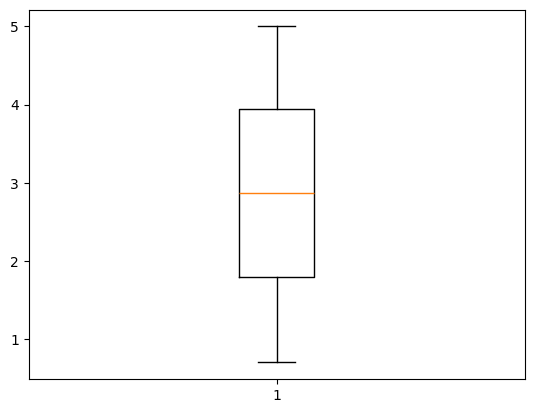

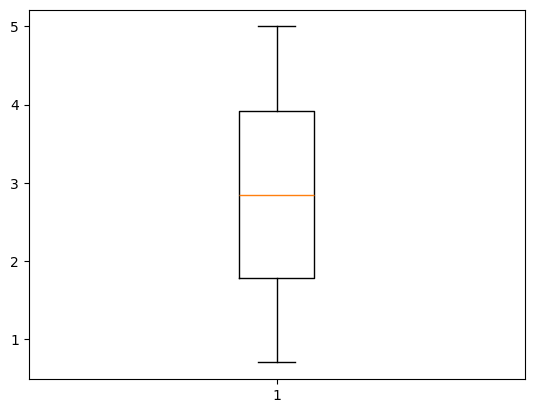

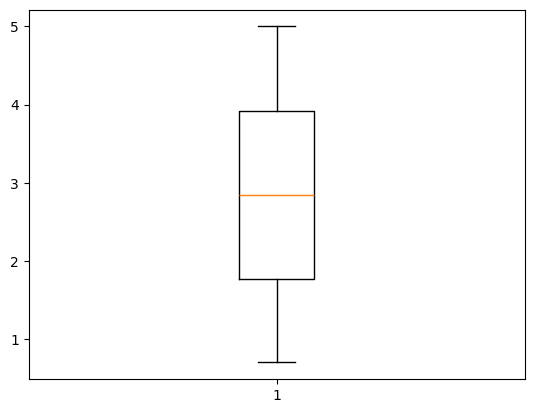

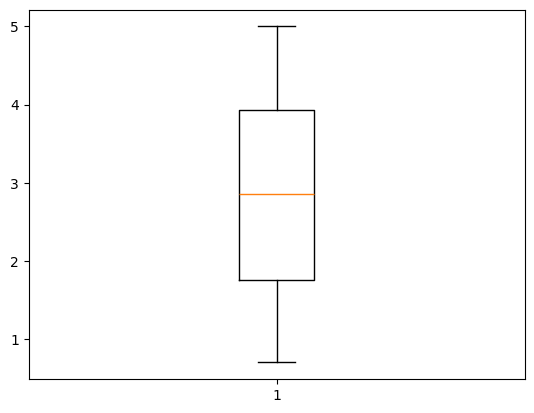

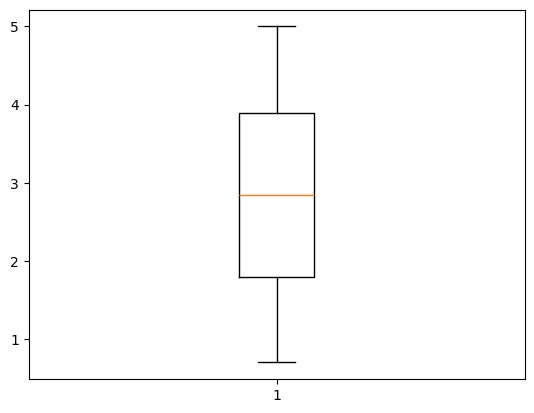

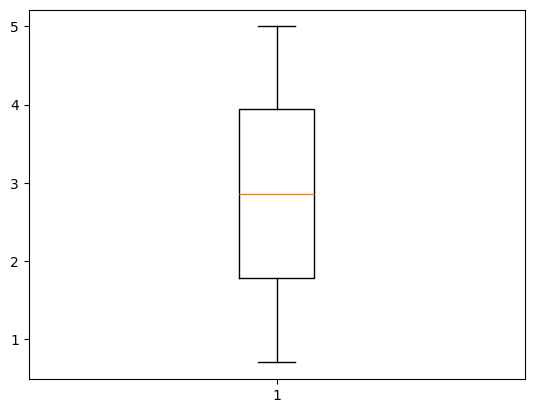

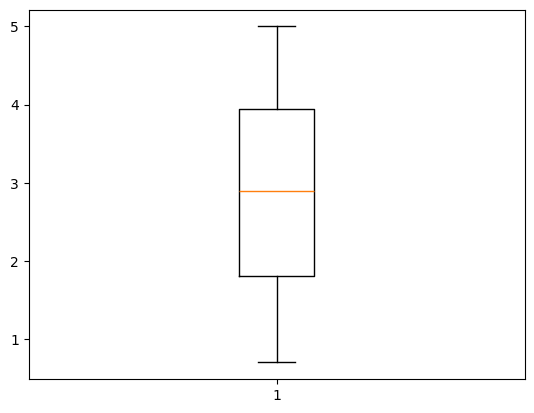

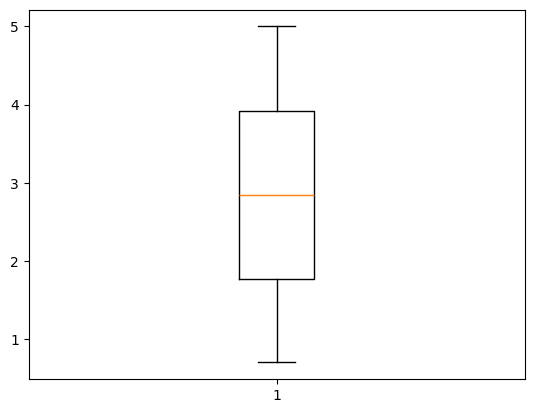

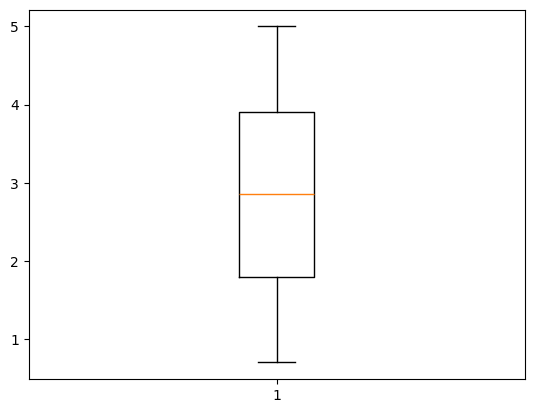

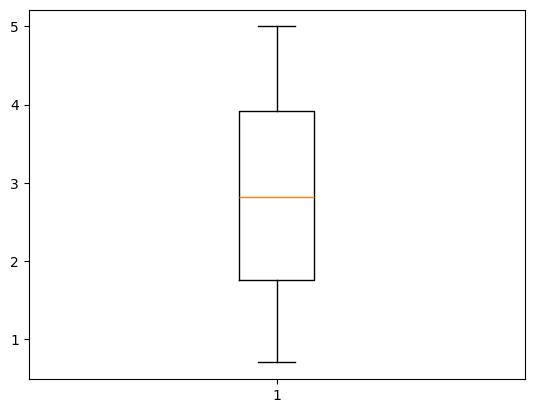

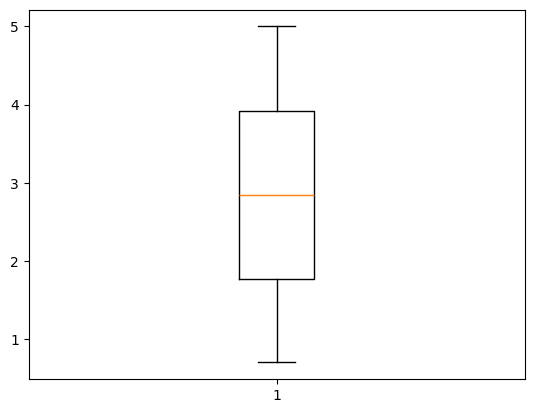

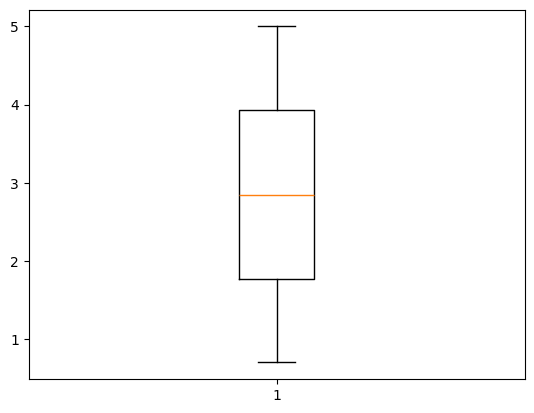

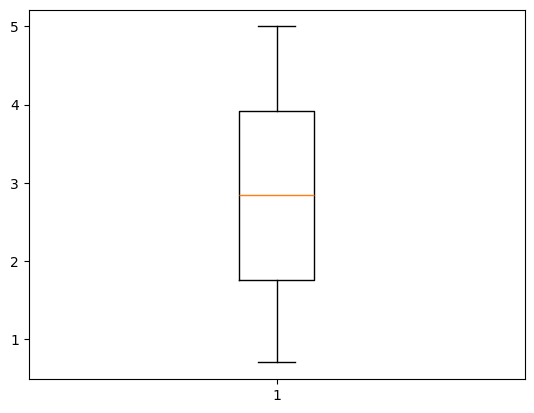

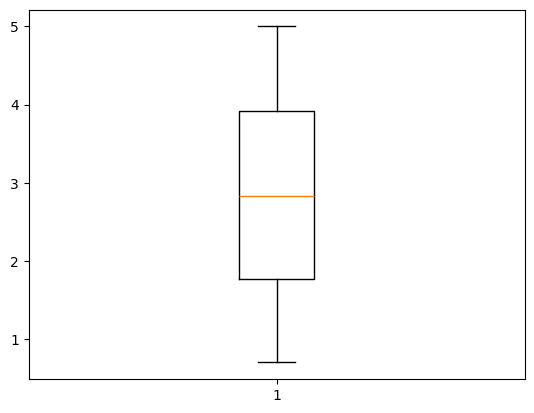

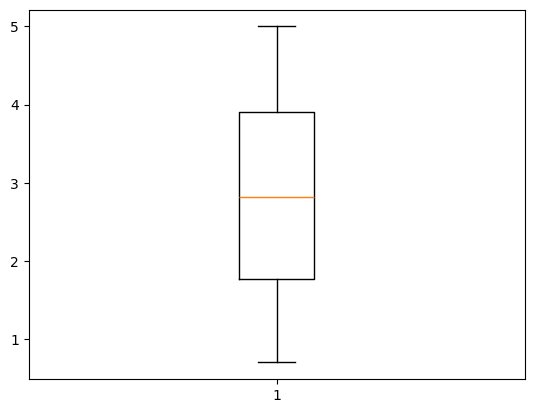

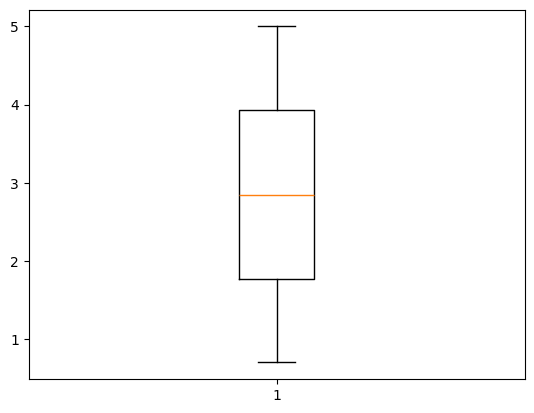

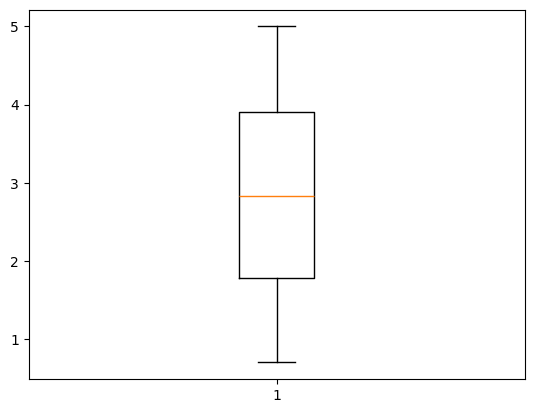

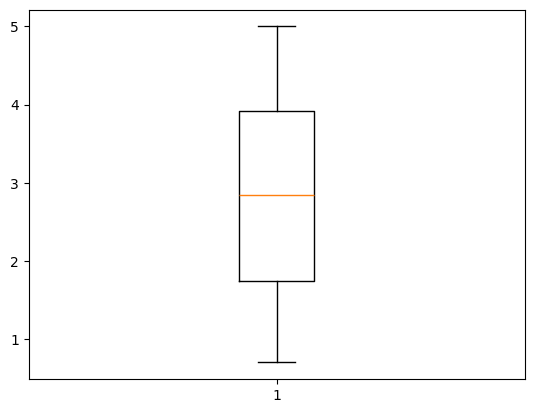

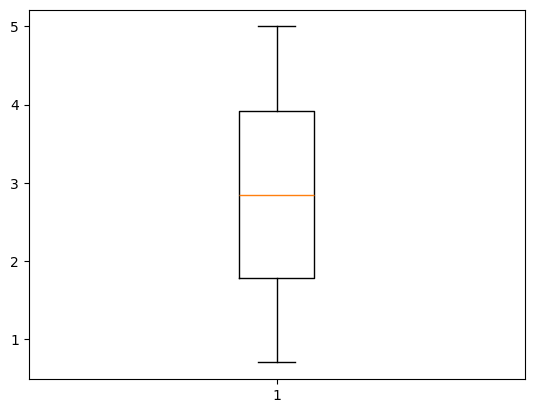

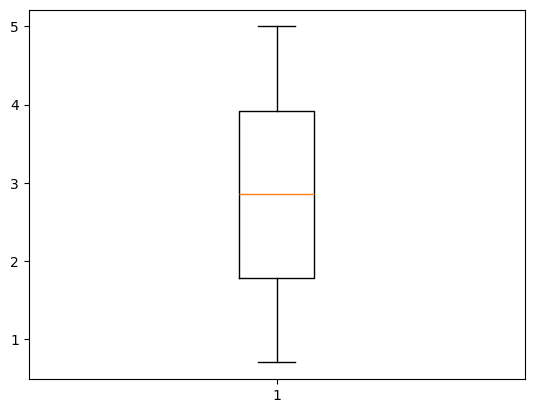

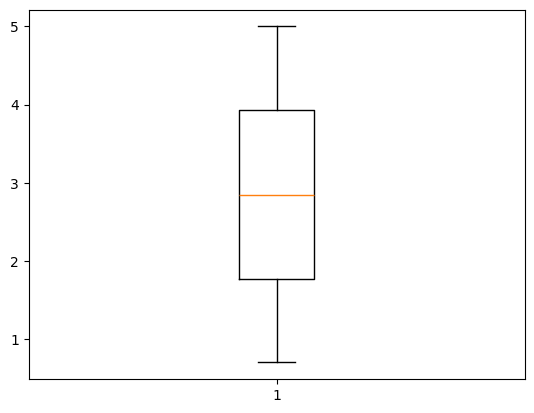

In [10]:
data.rename(columns = {0:"PPPF",1:"IMF"},inplace = True)
for i in range(2,41):
    plt.boxplot(x = data[i] )
    plt.show();
#below are the box plots of all the 39 featurs and none of them have potential outliers

Text(0.5, 1.0, 'PPPF')

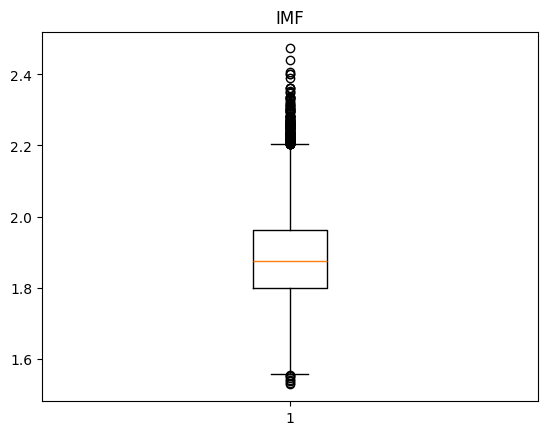

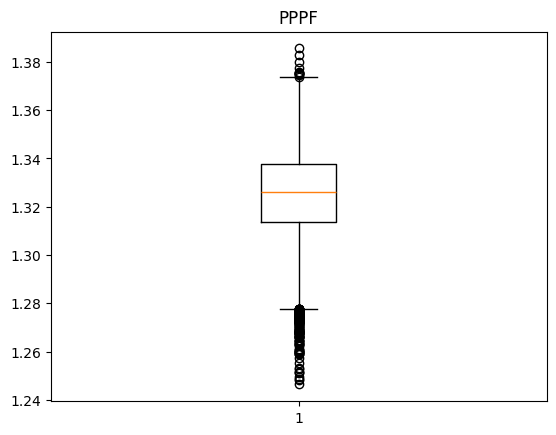

In [11]:
box_imf = plt.boxplot(x = data["IMF"])
plt.title("IMF")
plt.figure()
box_pppf = plt.boxplot(x = data["PPPF"])
plt.title("PPPF")
# the box plot shows that there are potential outliers in IMF and PPPF which need to be removed for a better dataset

In [12]:
# the outliers can be found calculating the Z - Score
data["z_score_imf"] = zscore(data["IMF"])
data["z_score_pppf"] = zscore(data["PPPF"])
data.drop(data[(data["z_score_imf"]>3) | (data["z_score_imf"]<-3)|(data["z_score_pppf"]>3)|(data["z_score_imf"]<-3)].index,axis = 0,inplace = True)
data.drop(data[["z_score_imf","z_score_pppf"]],axis = 1,inplace = True)
# the potential outliers are removed

In [13]:
i = data.corr()
for r in range(2,41):
    print(i[((i[r]>0.5)|(i[r]<-0.5))&(i[r]!=1)])
# the above code tells us that none of the features are highly correlated(r>0.5) and so none of the features have to be removed from the dataset

Empty DataFrame
Columns: [PPPF, IMF, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
Index: []

[0 rows x 41 columns]
Empty DataFrame
Columns: [PPPF, IMF, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
Index: []

[0 rows x 41 columns]
Empty DataFrame
Columns: [PPPF, IMF, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
Index: []

[0 rows x 41 columns]
Empty DataFrame
Columns: [PPPF, IMF, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
Index: []

[0 rows x 41 columns]
Empty DataFrame
Columns: [PPPF, IMF, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,

<Axes: >

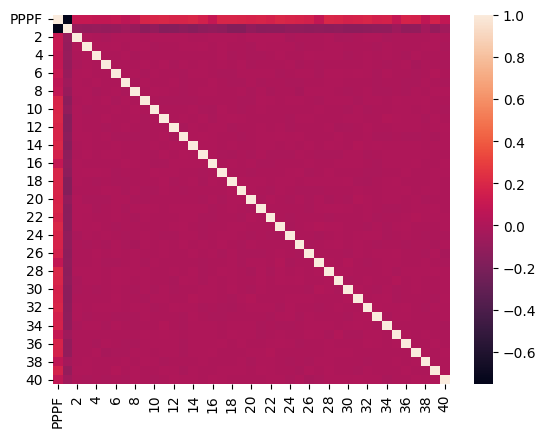

In [14]:
sn.heatmap(i) # the heatmap also suggests the same idea that none of the 39 features are highly correlated

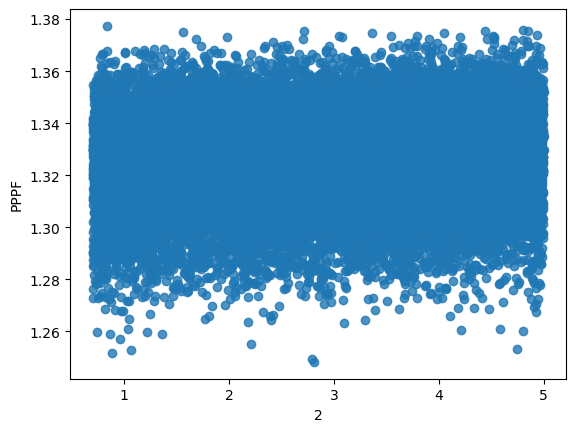

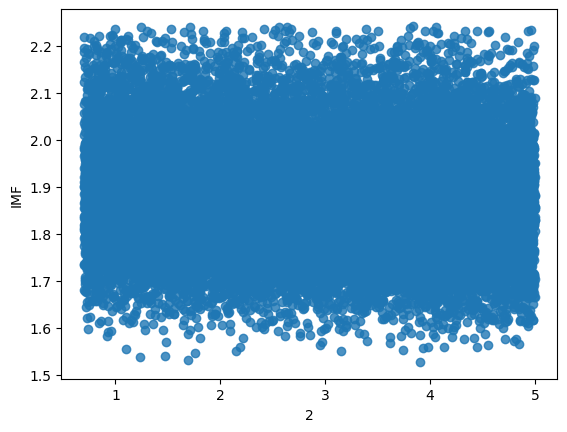

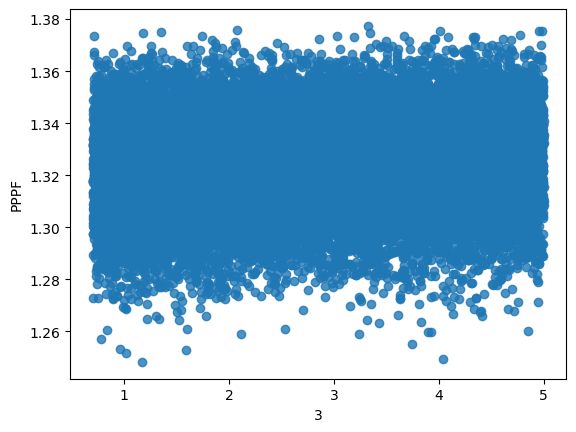

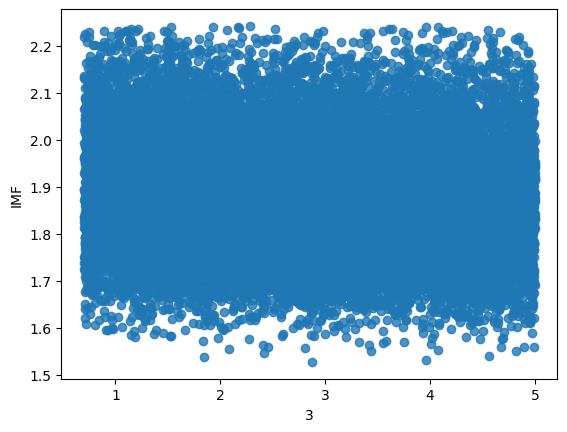

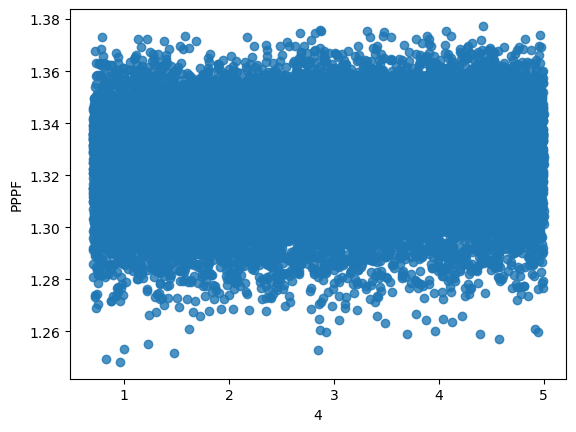

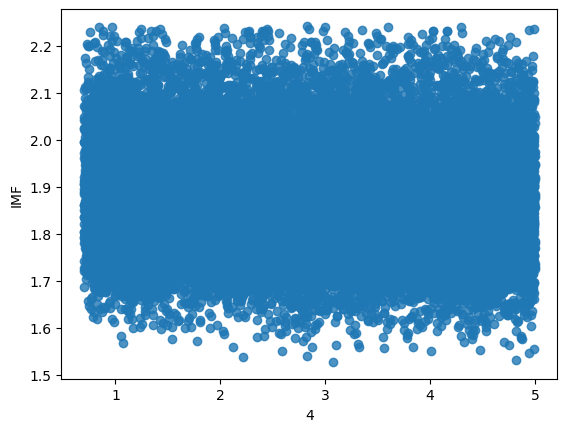

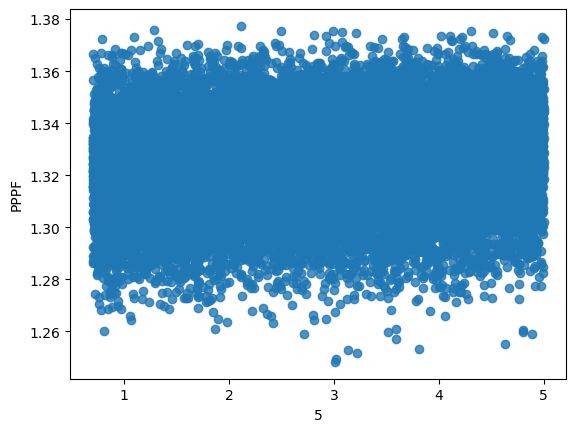

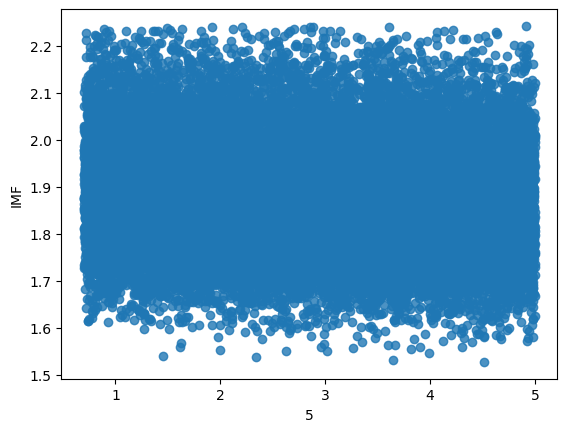

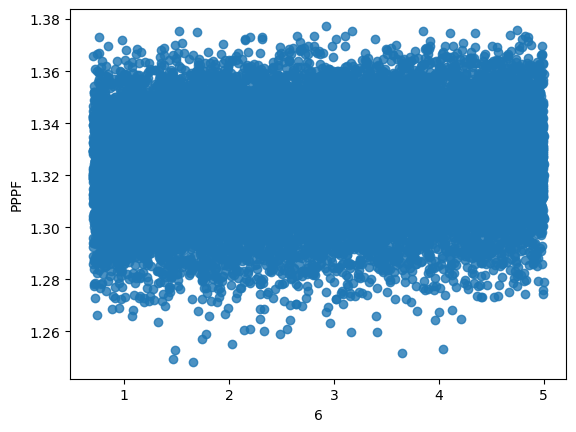

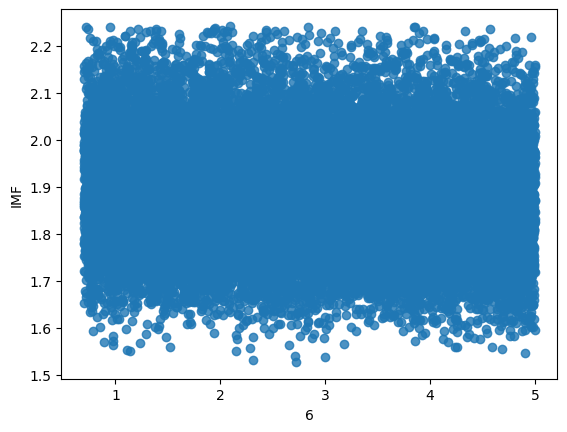

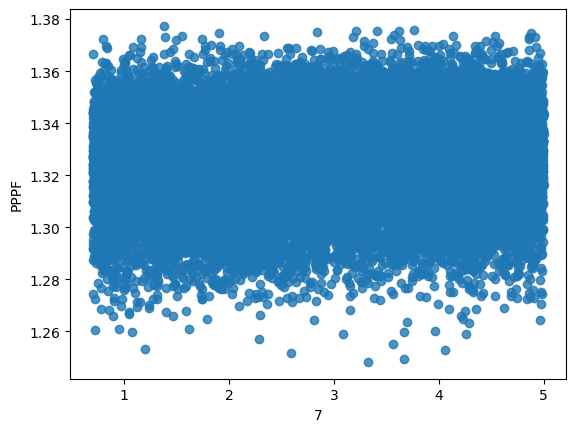

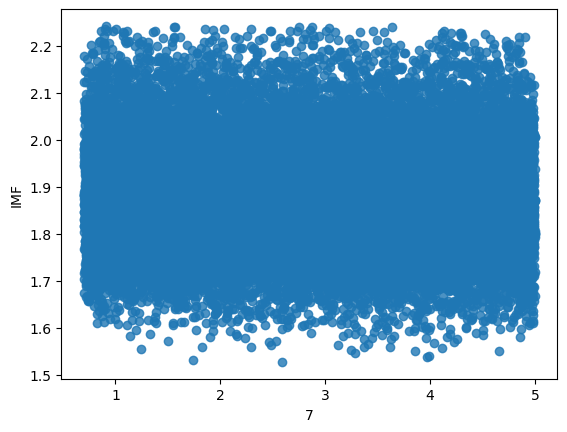

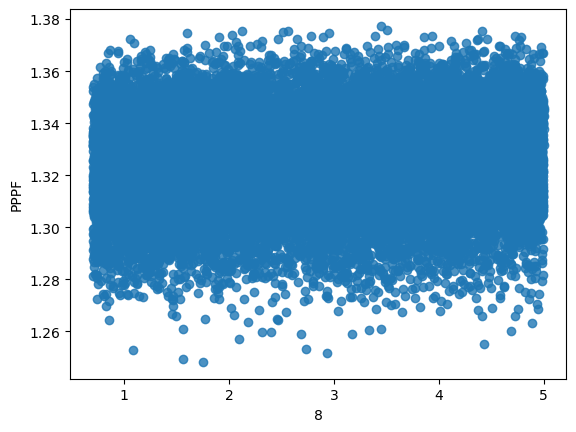

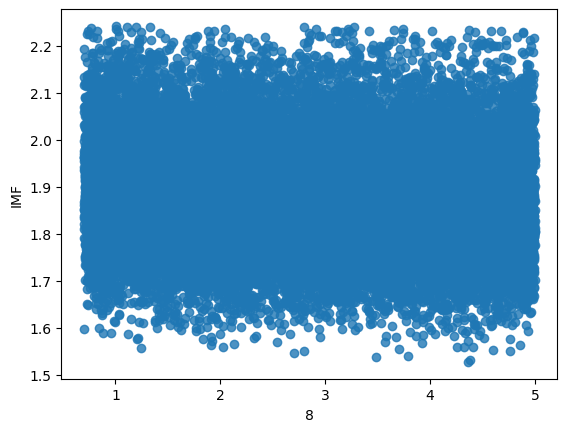

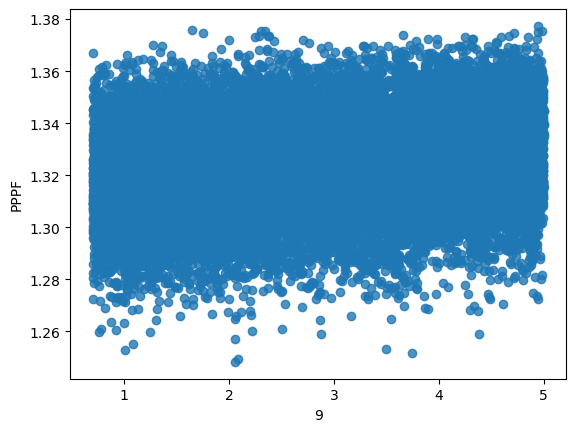

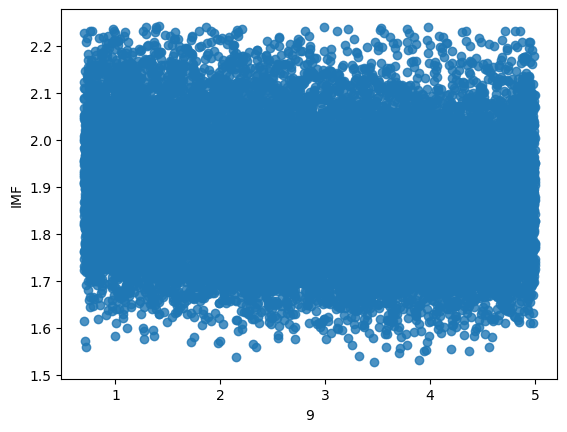

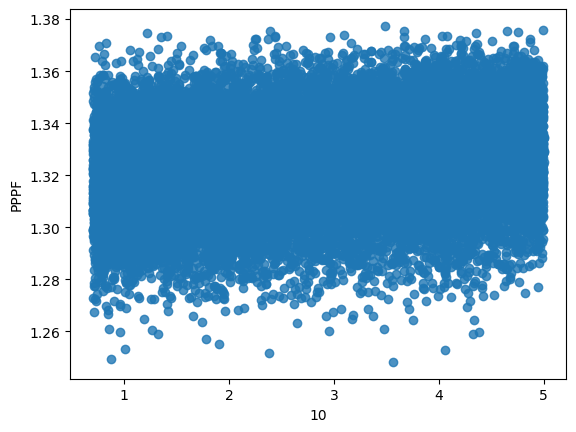

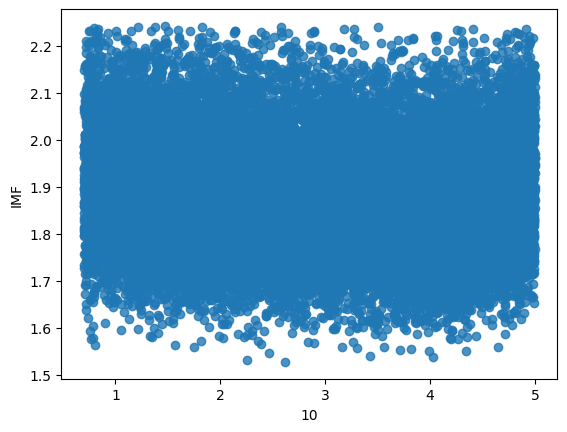

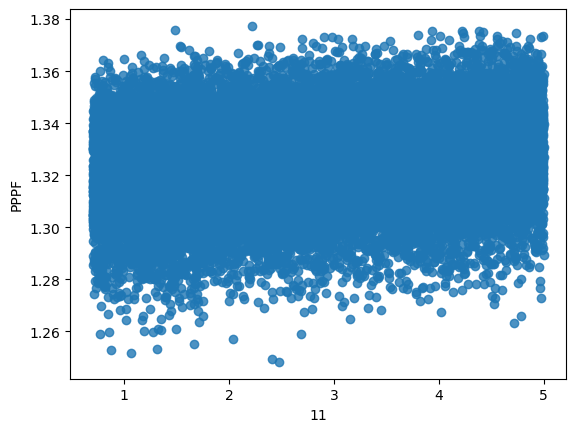

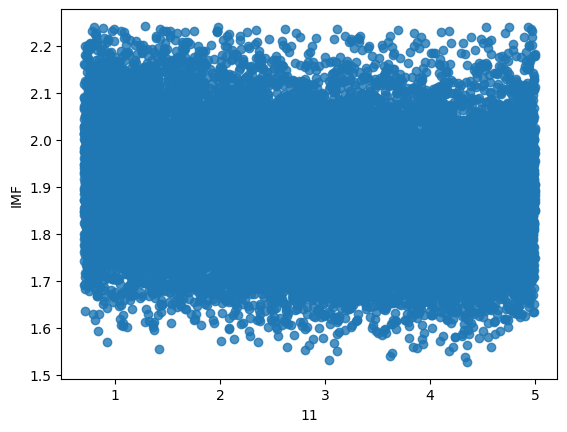

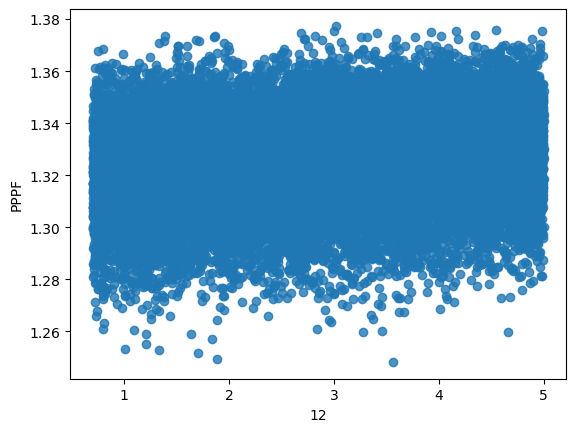

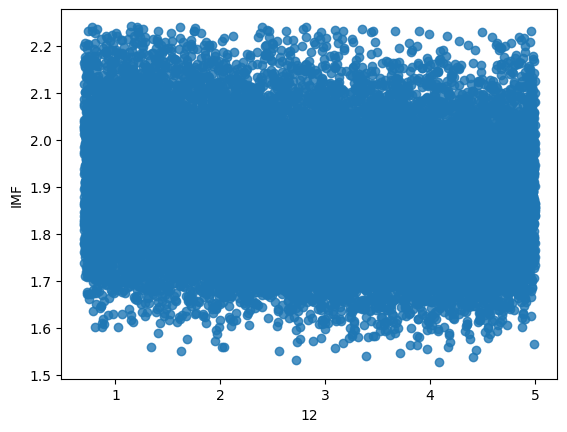

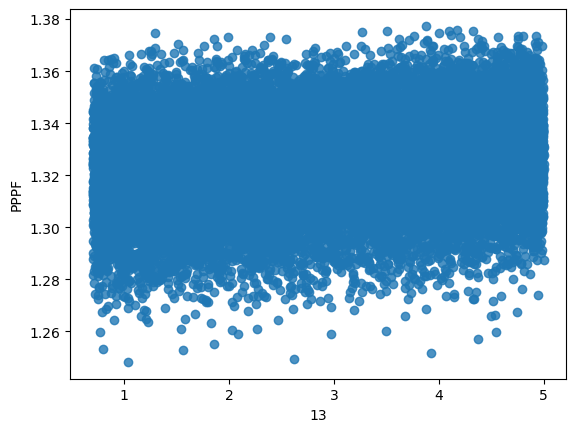

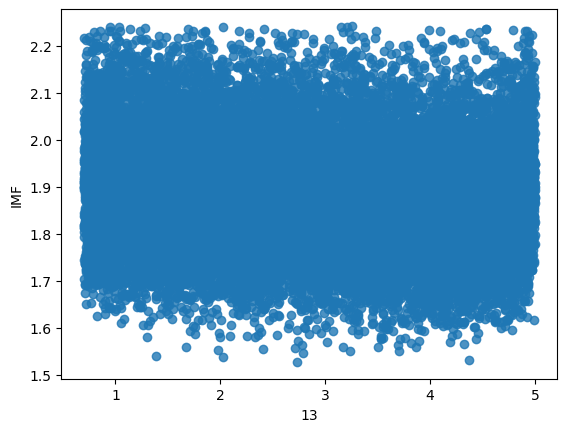

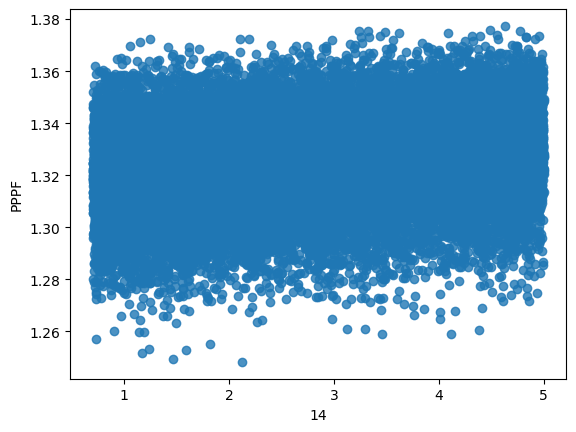

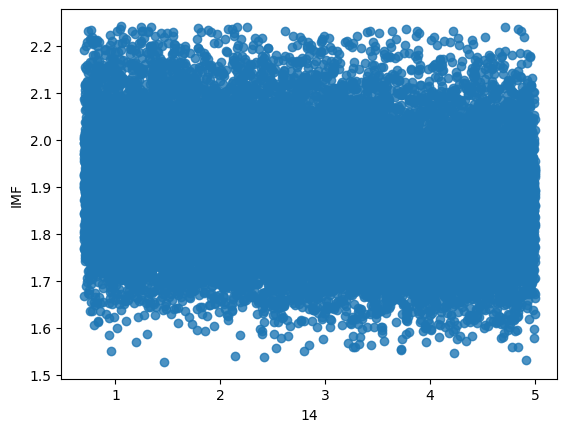

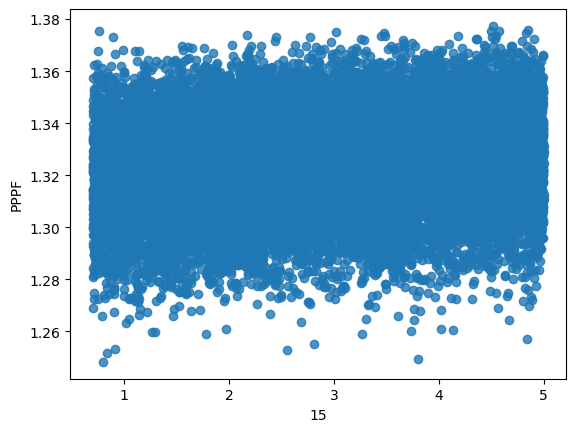

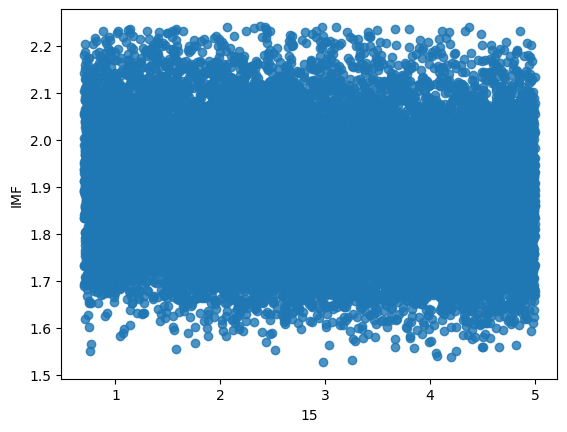

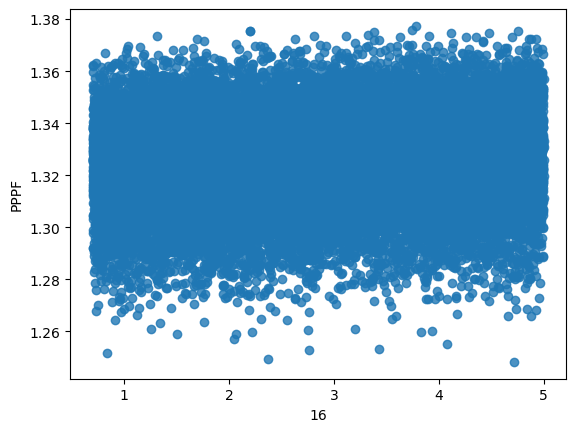

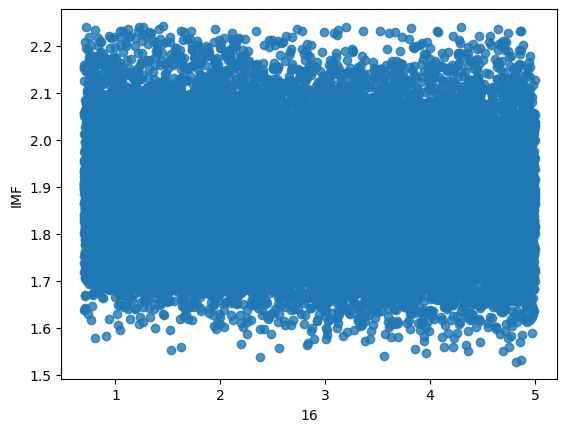

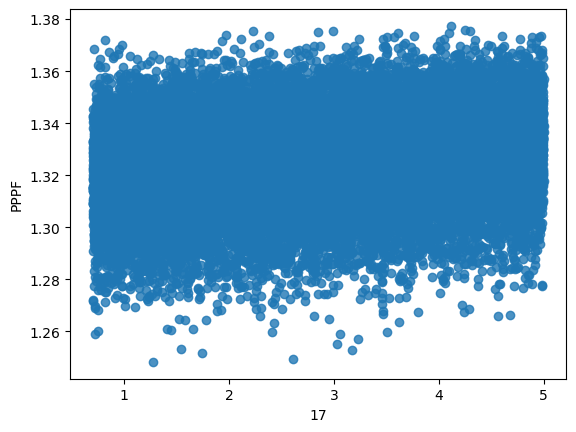

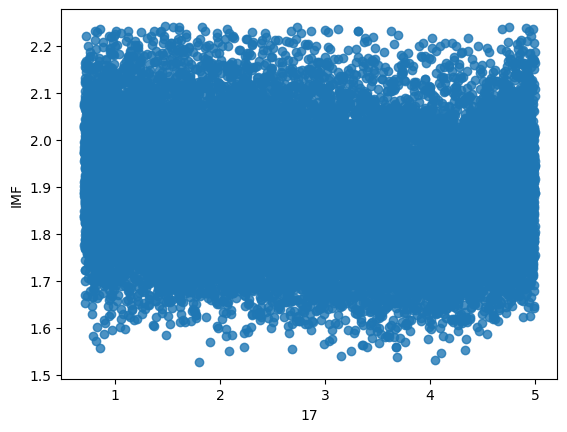

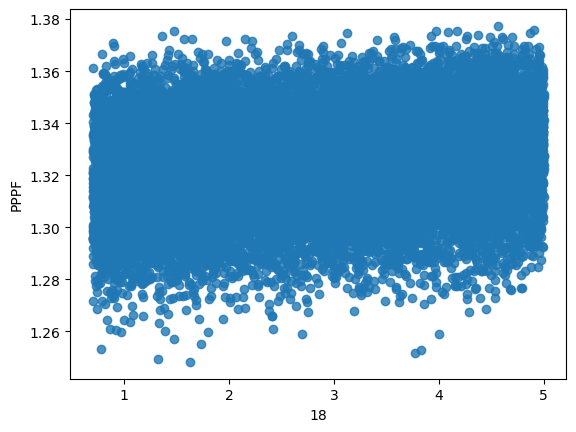

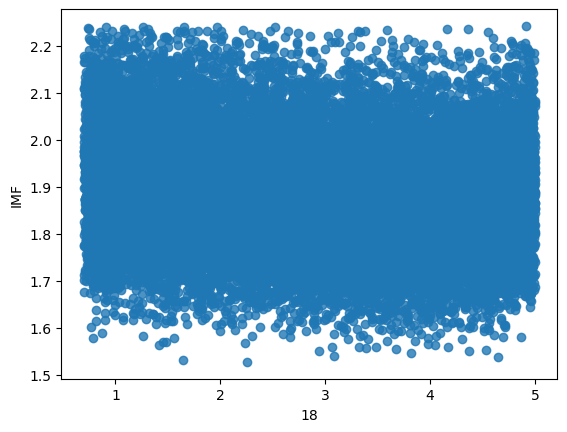

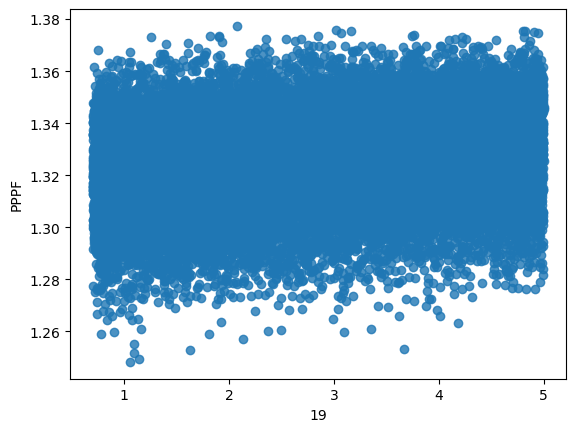

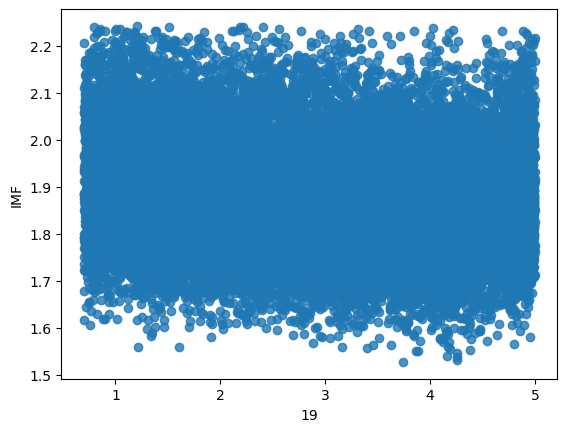

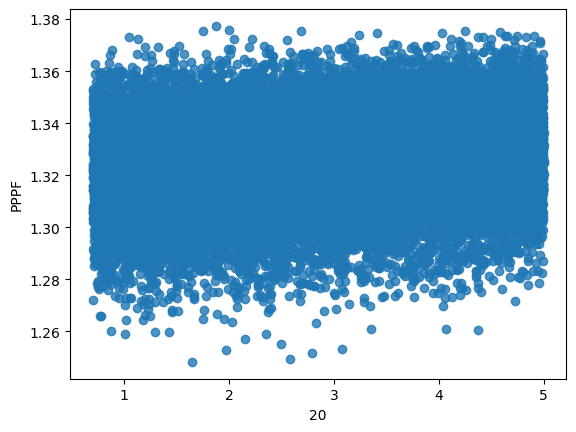

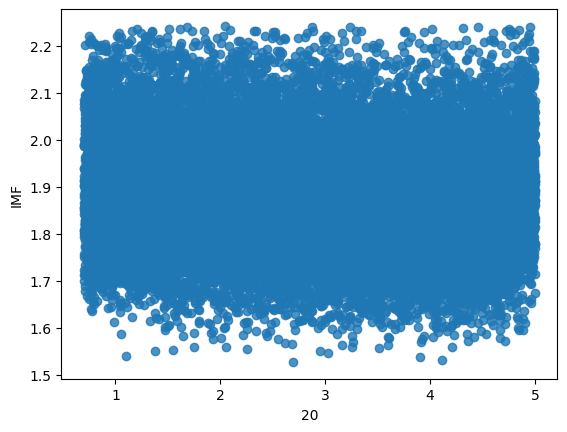

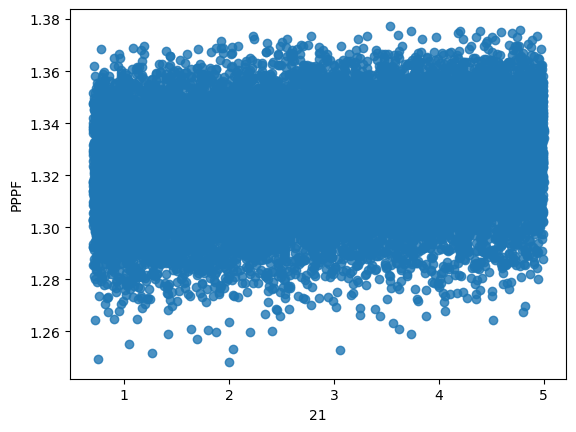

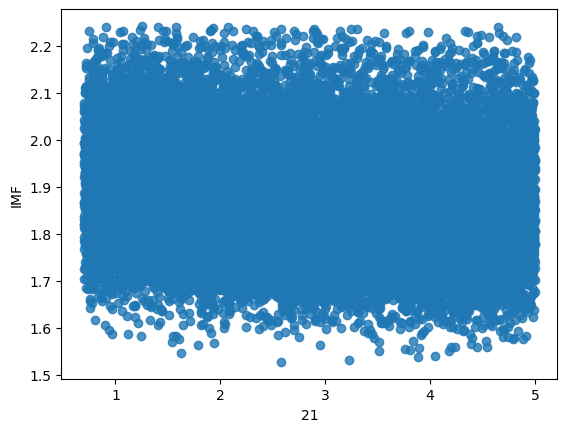

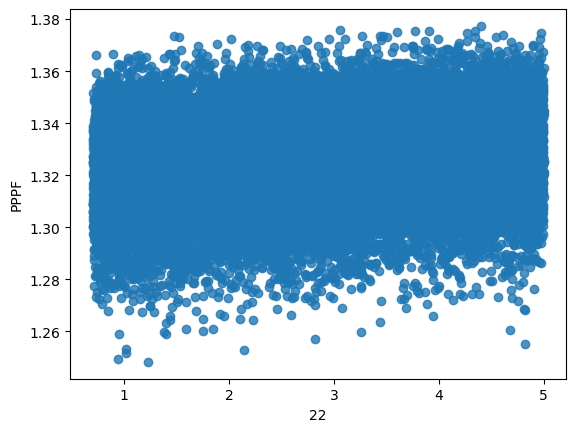

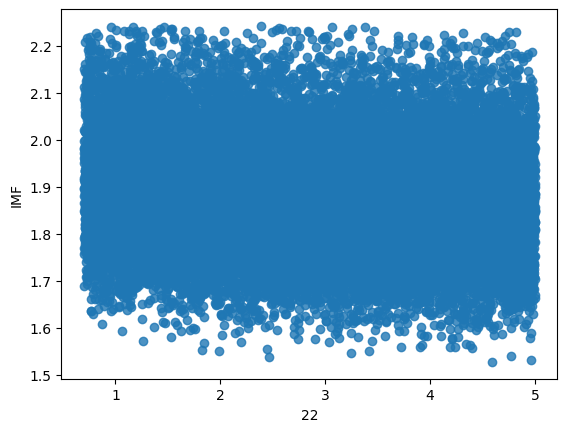

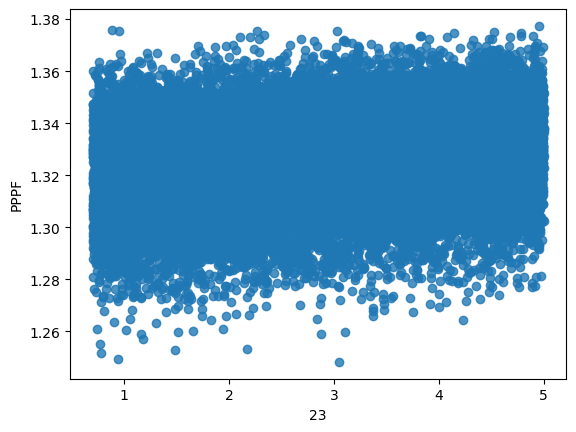

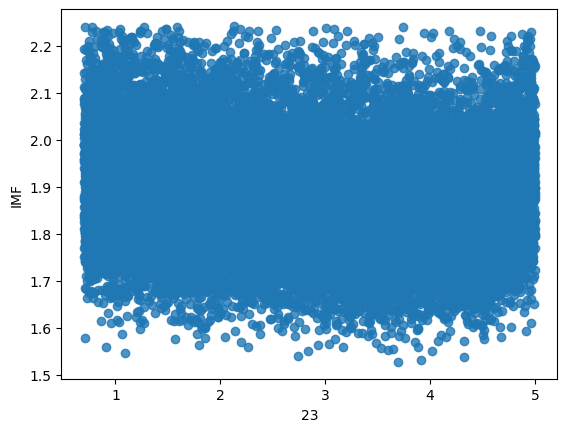

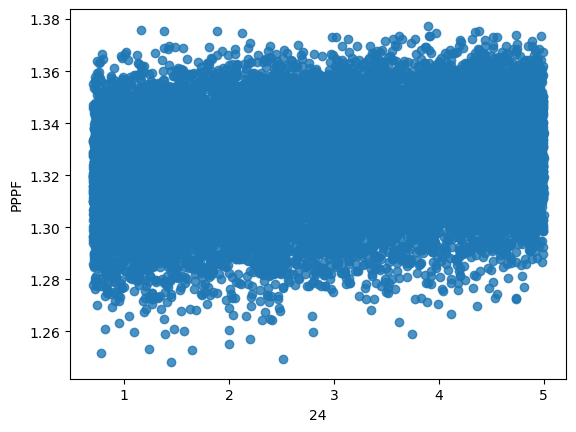

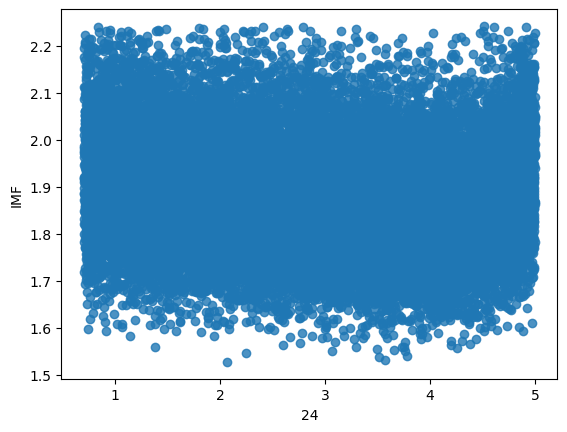

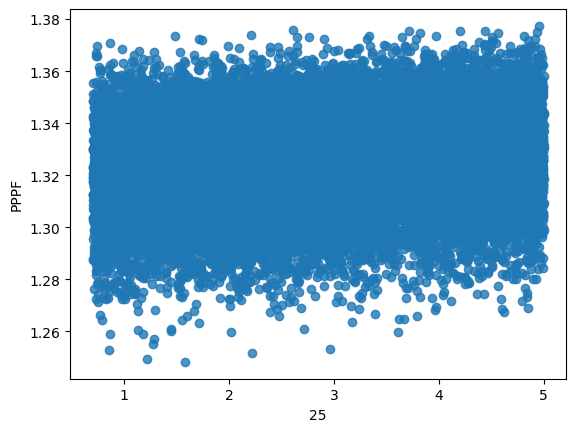

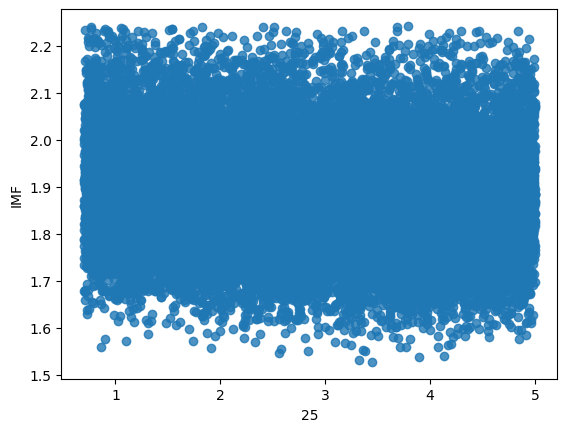

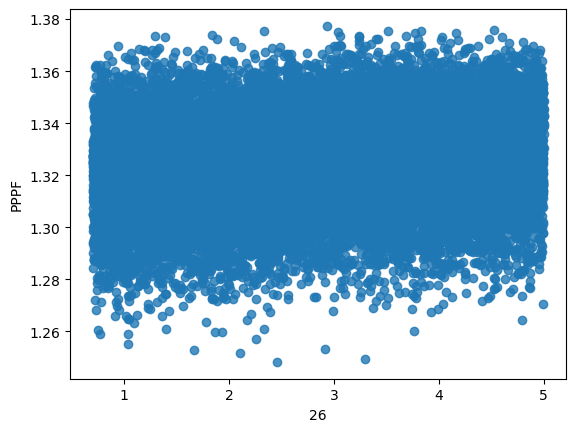

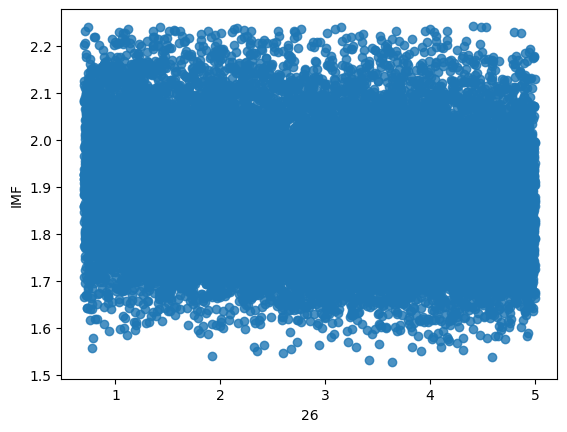

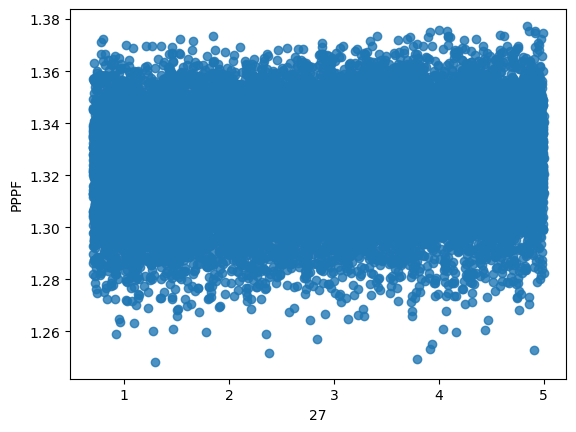

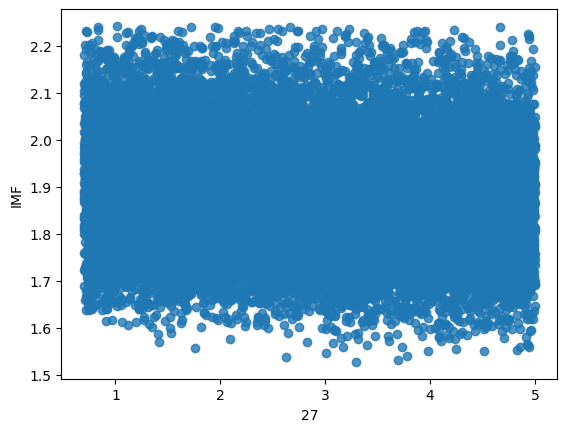

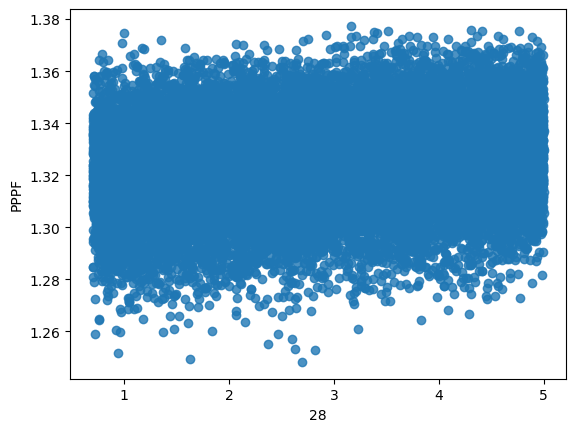

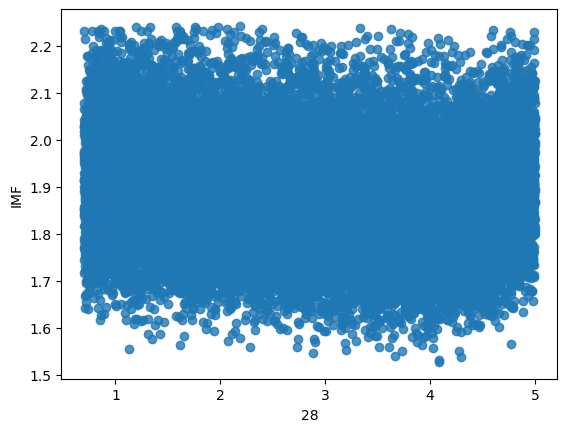

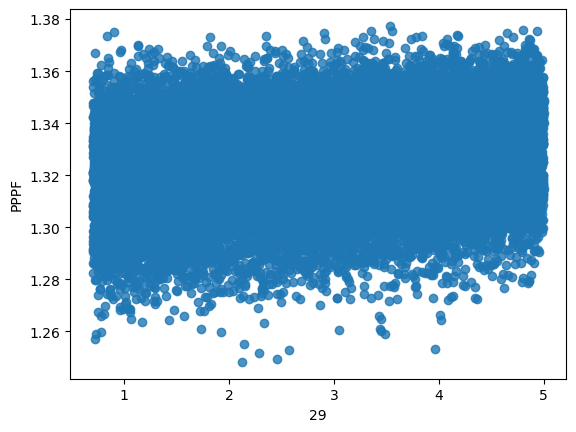

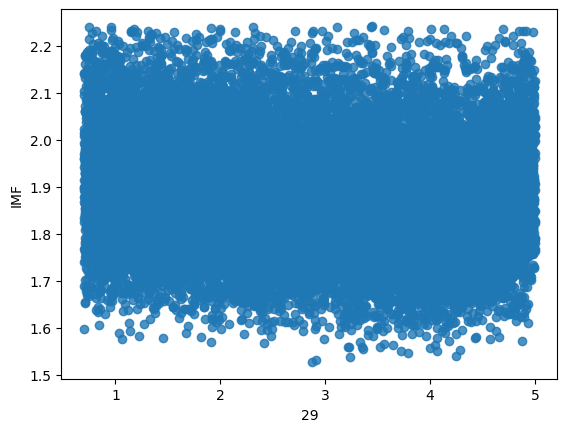

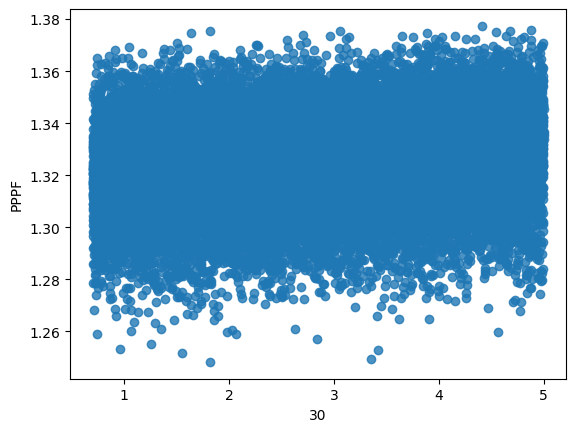

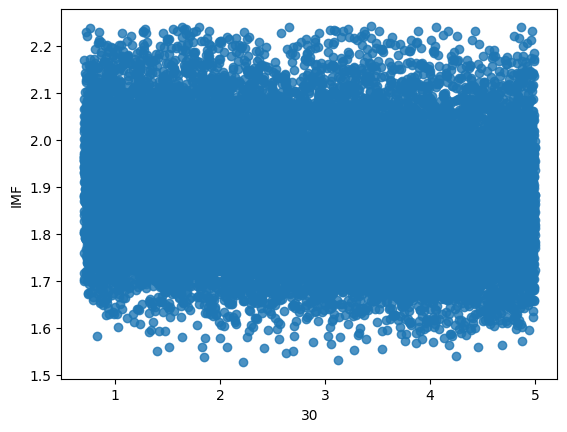

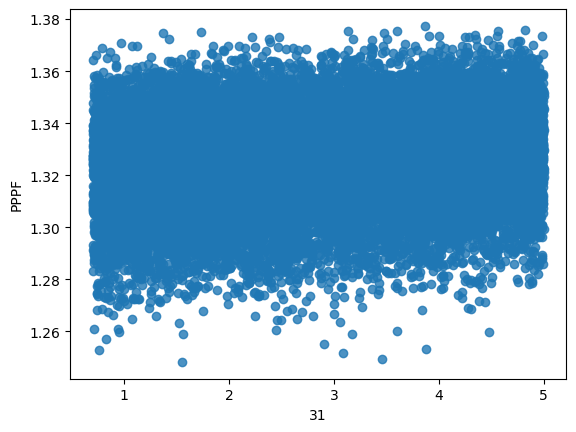

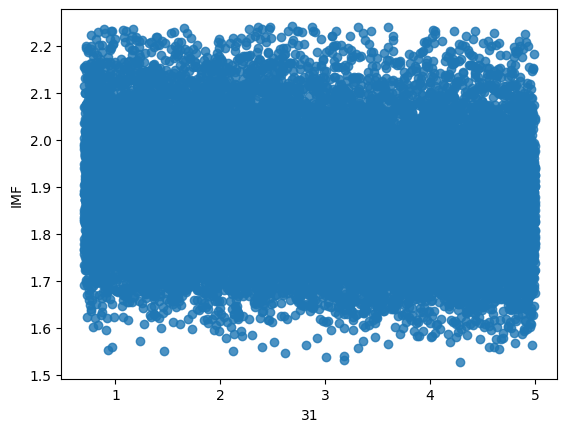

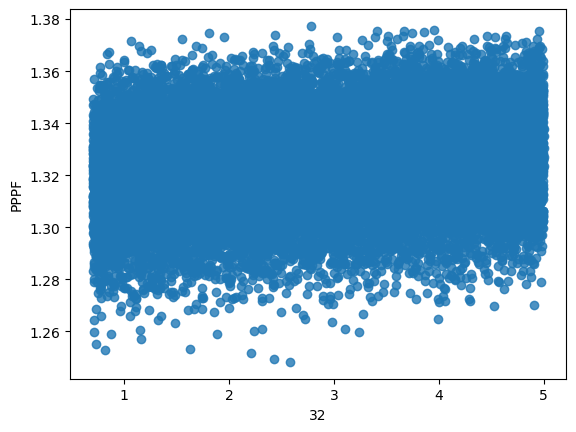

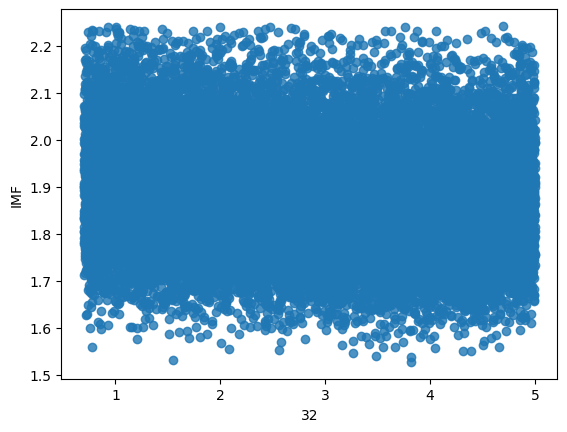

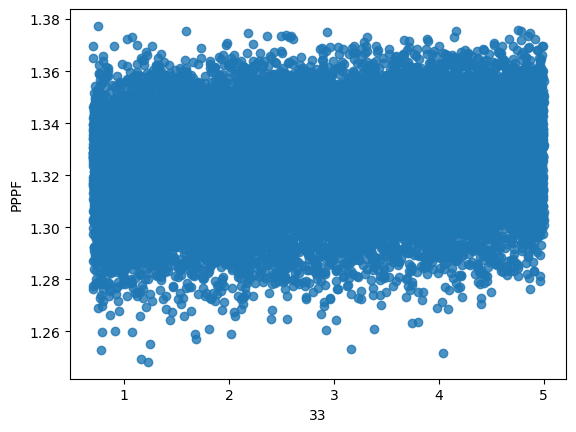

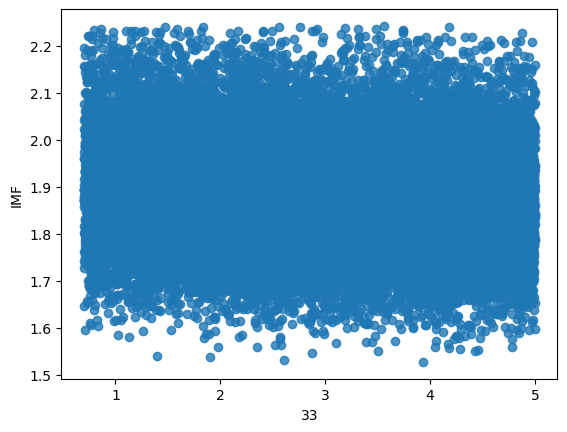

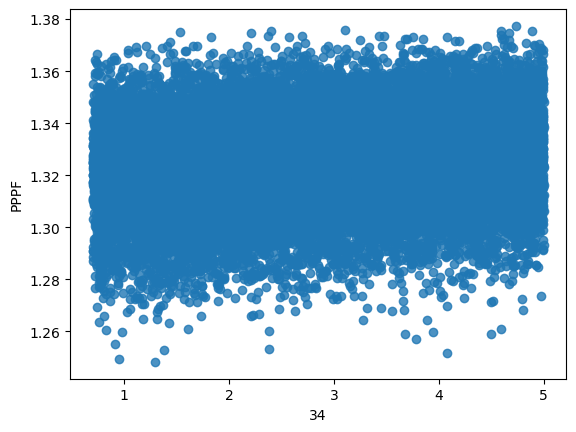

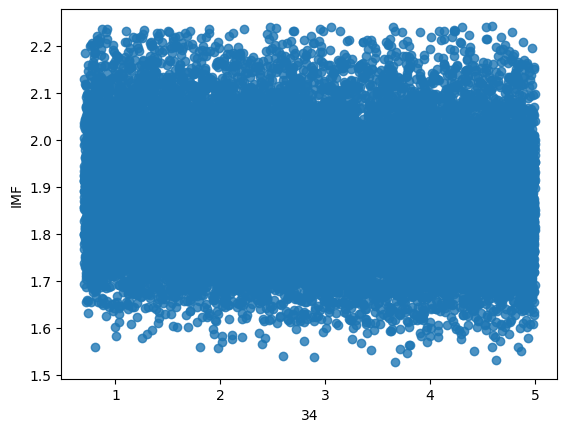

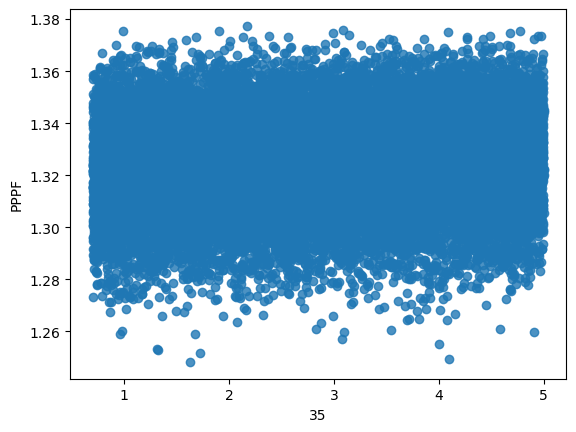

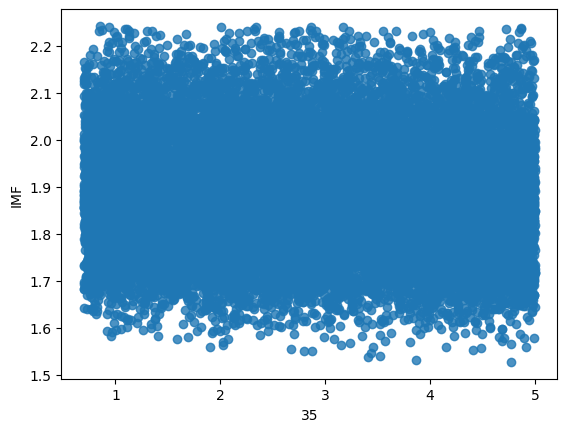

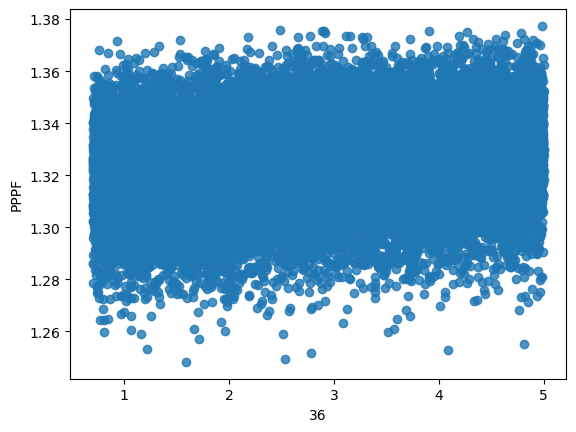

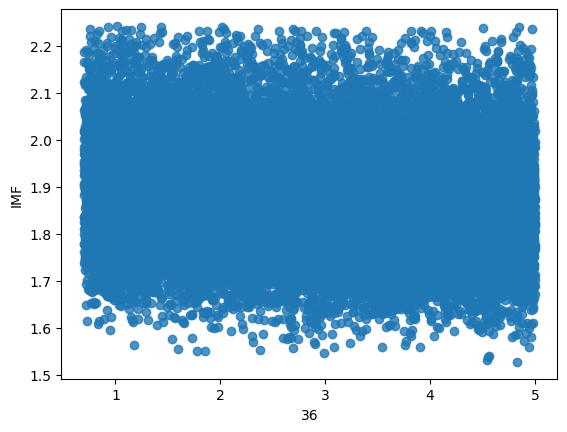

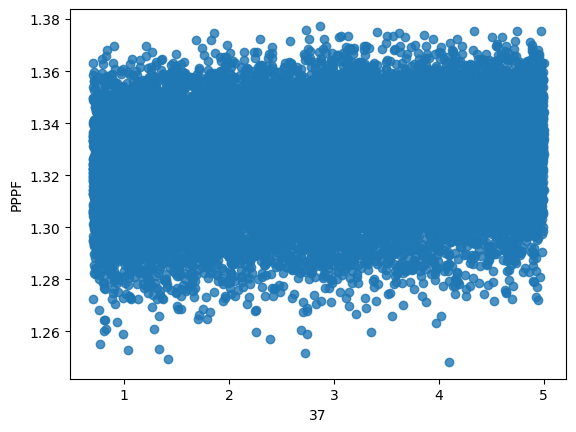

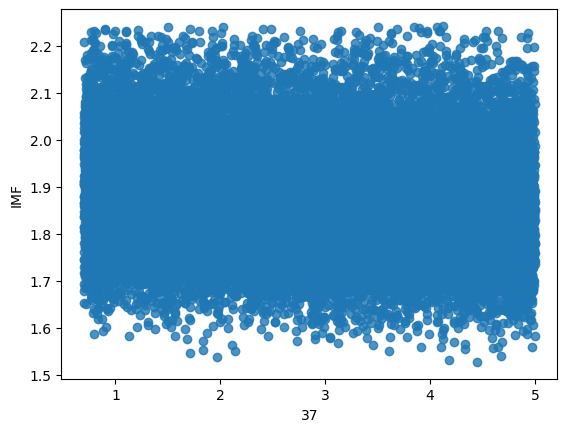

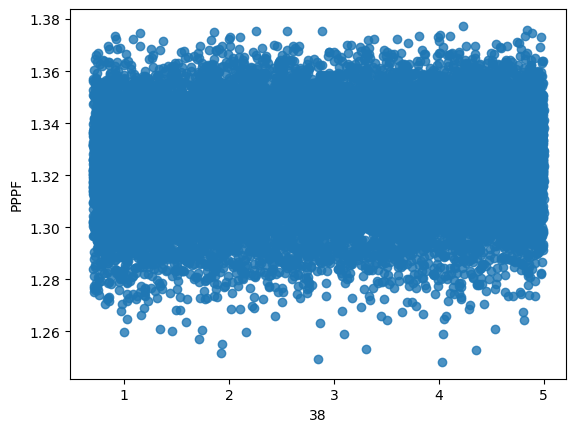

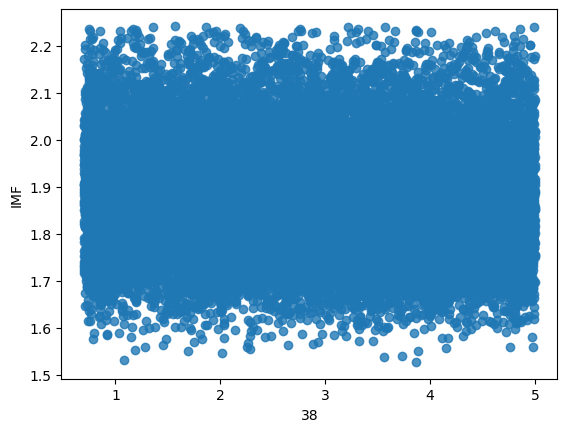

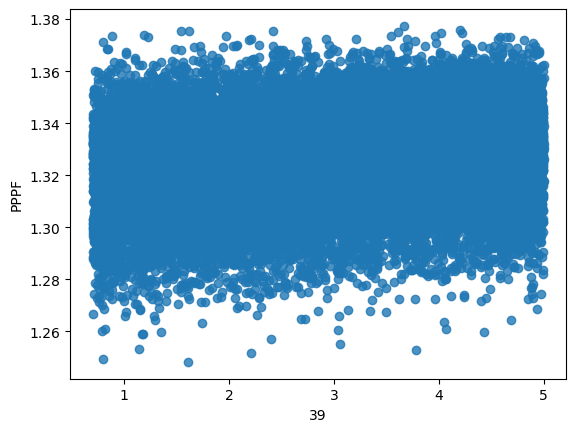

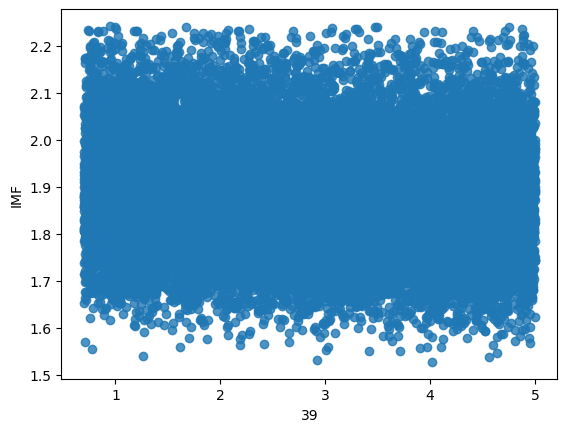

In [35]:
for i in range(2,40):
    sn.regplot(x = data.iloc[:,i], y = data.iloc[:, 0])
    plt.show()
    sn.regplot(x = data.iloc[:,i], y = data.iloc[:,1])
    plt.show()
# the scatter plot shows that the 39 features are randomly scattered wrt PPPF and IMF

In [31]:
# Step - 4 : Modelling
# as the features are randomly scattered wrt the target variables(IMF and PPPF) and we also have thousands of observations, we should use a tree based model,further as there is low correlation between targets and features we use Random forest Regression
X_train = data[range(2,41)]
Y_train_pppf = data["PPPF"]
Y_train_imf = data["IMF"]
X_test = test[range(2,41)]
Y_test_pppf = test[0]
Y_test_imf = test[1]
model_pppf = rfr(max_depth = 15).fit(X_train, Y_train_pppf)
model_imf = rfr(max_depth = 15).fit(X_train, Y_train_imf)

In [32]:
# Step - 5 : Evaluation
print(f"The r2 score of the model predicting PPPF before tuning : {metric.r2_score(Y_test_pppf,model_pppf.predict(X_test))}\nThe RMSE: {np.sqrt(metric.mean_squared_error(Y_test_pppf,model_pppf.predict(X_test)))}\nThe r2 score for the model predicting IMF before tuning : {metric.r2_score(Y_test_imf,model_imf.predict(X_test))}\nThe RMSE : {np.sqrt(metric.mean_squared_error(Y_test_imf,model_imf.predict(X_test)))}")

The r2 score of the model predicting PPPF before tuning : 0.5969709697967001
The RMSE: 0.012353165158173347
The r2 score for the model predicting IMF before tuning : 0.4531363494101507
The RMSE : 0.09115434264392237


In [26]:
# we do hyperparameter tuning and cross validation
params = {"n_estimators" : (50,100), "max_depth" : (5,30), "max_features" : ("sqrt","log2")}
bs_pppf = bs(estimator = rfr(),search_spaces=params,scoring='r2', cv = 5).fit(X_train, Y_train_pppf)
bs_imf = bs(estimator = rfr(),search_spaces=params,scoring='r2', cv = 5).fit(X_train, Y_train_imf)

/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 'sqrt', 100] before, using random point [23, 'sqrt', 76]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [27, 'sqrt', 100] before, using random point [13, 'sqrt', 79]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 'sqrt', 100] before, using random point [27, 'sqrt', 98]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [23, 'sqrt', 100] before, using random point [16, 'sqrt', 63]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [29, 'sqrt', 100] before, using random 

In [34]:
print(f"The r2 score of the model predicting PPPF after tuning : {metric.r2_score(Y_test_pppf,bs_pppf.predict(X_test))}\nThe RMSE: {np.sqrt(metric.mean_squared_error(Y_test_pppf,bs_pppf.predict(X_test)))}\nThe r2 score for the model predicting IMF after tuning : {metric.r2_score(Y_test_imf,bs_imf.predict(X_test))}\nThe RMSE : {np.sqrt(metric.mean_squared_error(Y_test_imf,bs_imf.predict(X_test)))}")

The r2 score of the model predicting PPPF after tuning : 0.5643199378050774
The RMSE: 0.012843811588420044
The r2 score for the model predicting IMF after tuning : 0.4362267517778111
The RMSE : 0.09255290761538387


In [ ]:
# as the scoring parameters have decreased after tuning, that indicates that adjustments made to the hyperparameters during tuning resulted in less optimal fit to the data